In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import re
import psycopg2
import json
import math
import datetime
from sqlalchemy import create_engine
import seaborn as sb

import pprint
pp = pprint.PrettyPrinter(indent=4)

from ipywidgets import interact, interactive
import ipywidgets as widgets

from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu

from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, plot_confusion_matrix, balanced_accuracy_score
import joblib

from IPython.core.display import HTML
from urllib.parse import urlparse, parse_qs
pd.options.display.max_columns = 150
pd.options.display.max_rows = 150
HTML("<style>.container { width:100% !important; }</style>")



In [9]:
data_raw = pd.read_csv('raw_data/2021-09-01 De Stemming/DS2021_DANS.csv', sep='\t', header=0)
data_raw['Provincie'] = data_raw['Provincie'].replace({
    1:'Antwerpen',
    2:'Limburg',
    3:'Oost-Vlaanderen',
    4:'Vlaams-Brabant',
    5:'West-Vlaanderen'
})
data_raw['Gender'] = data_raw['Gender'].replace({
    1:'Man',
    2:'Vrouw',
    3:'Andere'
})
data_raw['Education'] = data_raw['Education'].replace({
    1:'1_Geen of lager onderwijs',
    2:'2_Middelbaar onderwijs, niet volledig afgewerkt',
    3:'3_Middelbaar onderwijs, volledig afgewerkt',
    4:'4_Hoger niet-universitair onderwijs',
    5:'5_Universitair onderwijs'
})
data_raw['Vote2019_Fed'] = data_raw['Vote2019_Fed'].replace({
    1:'4_CD&V',
    2:'2_Groen',
    3:'6_N-VA',
    4:'5_Open VLD',
    5:'1_PVDA',
    6:'3_sp.a',
    7:'7_Vlaams Belang',
    8:'Andere',
    9:'Blanco',
    10:'Niet gaan stemmen',
    11:'Mocht nog niet gaan stemmen',
    12:'Ik weet het niet meer'
})

data_raw['VoteChoiceNow'] = data_raw['VoteChoiceNow'].replace({
    1:'4_CD&V',
    2:'2_Groen',
    3:'6_N-VA',
    4:'5_Open VLD',
    5:'1_PVDA',
    6:'3_VOORUIT',
    7:'7_Vlaams Belang',
    8:'Andere',
    9:'Blanco',
    10:'Niet gaan stemmen',
    11:'Mocht nog niet gaan stemmen',
    12:'Ik weet het niet meer'
})

data_raw['MIP_Closed_1'] = data_raw['MIP_Closed_1'].replace({
    1 : 'Belastingen',
    2 : 'Criminaliteit',
    3 : 'Defensie',
    4 : 'Economie',
    5 : 'Functioneren van de democratie',
    6 : 'Gezondheidszorg',
    7 : 'Klimaat',
    8 : 'Migratie',
    9 : 'Milieu',
    10 : 'Mobiliteit',
    11 : 'Onderwijs',
    12 : 'Pensioenen',
    13 : 'Sociale zekerheid',
    14 : 'Staatshervorming',
    15 : 'Welzijn',
    16 : 'Werkgelegenheid',
})

data_raw['MIP_Closed_2'] = data_raw['MIP_Closed_2'].replace({
    1 : 'Belastingen',
    2 : 'Criminaliteit',
    3 : 'Defensie',
    4 : 'Economie',
    5 : 'Functioneren van de democratie',
    6 : 'Gezondheidszorg',
    7 : 'Klimaat',
    8 : 'Migratie',
    9 : 'Milieu',
    10 : 'Mobiliteit',
    11 : 'Onderwijs',
    12 : 'Pensioenen',
    13 : 'Sociale zekerheid',
    14 : 'Staatshervorming',
    15 : 'Welzijn',
    16 : 'Werkgelegenheid',
})

data_raw['IO_HealthCare'] = data_raw['IO_HealthCare'].replace({
    1:'4_CD&V',
    2:'2_Groen',
    3:'6_N-VA',
    4:'5_Open VLD',
    5:'1_PVDA',
    6:'3_VOORUIT',
    7:'7_Vlaams Belang',
    8:'Andere',
    9:'Geen enkele partij',
    10:'Alle partijen gelijkwaardig'
})

data_raw['IO_Migration'] = data_raw['IO_Migration'].replace({
    1:'4_CD&V',
    2:'2_Groen',
    3:'6_N-VA',
    4:'5_Open VLD',
    5:'1_PVDA',
    6:'3_VOORUIT',
    7:'7_Vlaams Belang',
    8:'Andere',
    9:'Geen enkele partij',
    10:'Alle partijen gelijkwaardig'
})

data_raw['IO_Economy'] = data_raw['IO_Economy'].replace({
    1:'4_CD&V',
    2:'2_Groen',
    3:'6_N-VA',
    4:'5_Open VLD',
    5:'1_PVDA',
    6:'3_VOORUIT',
    7:'7_Vlaams Belang',
    8:'Andere',
    9:'Geen enkele partij',
    10:'Alle partijen gelijkwaardig'
})

data_raw['IO_Climate'] = data_raw['IO_Climate'].replace({
    1:'1_CD&V',
    2:'2_Groen',
    3:'6_N-VA',
    4:'5_Open VLD',
    5:'1_PVDA',
    6:'3_VOORUIT',
    7:'7_Vlaams Belang',
    8:'Andere',
    9:'Geen enkele partij',
    10:'Alle partijen gelijkwaardig'
})

data_raw['IO_Employment'] = data_raw['IO_Employment'].replace({
    1:'4_CD&V',
    2:'2_Groen',
    3:'6_N-VA',
    4:'5_Open VLD',
    5:'1_PVDA',
    6:'3_VOORUIT',
    7:'7_Vlaams Belang',
    8:'Andere',
    9:'Geen enkele partij',
    10:'Alle partijen gelijkwaardig'
})

data_raw['IO_Pensions'] = data_raw['IO_Pensions'].replace({
    1:'4_CD&V',
    2:'2_Groen',
    3:'6_N-VA',
    4:'5_Open VLD',
    5:'1_PVDA',
    6:'3_VOORUIT',
    7:'7_Vlaams Belang',
    8:'Andere',
    9:'Geen enkele partij',
    10:'Alle partijen gelijkwaardig'
})

data_raw['IO_SocialSecurity'] = data_raw['IO_SocialSecurity'].replace({
    1:'1_CD&V',
    2:'2_Groen',
    3:'6_N-VA',
    4:'5_Open VLD',
    5:'1_PVDA',
    6:'3_VOORUIT',
    7:'7_Vlaams Belang',
    8:'Andere',
    9:'Geen enkele partij',
    10:'Alle partijen gelijkwaardig'
})


data_raw['IO_Mobility'] = data_raw['IO_Mobility'].replace({
    1:'4_CD&V',
    2:'2_Groen',
    3:'6_N-VA',
    4:'5_Open VLD',
    5:'1_PVDA',
    6:'3_VOORUIT',
    7:'7_Vlaams Belang',
    8:'Andere',
    9:'Geen enkele partij',
    10:'Alle partijen gelijkwaardig'
})

data_raw['Age_group'] = pd.cut(data_raw['Age'], [0, 25, 35, 45, 55, 65, 150], right=False)


## Selecteer partij en definitie van potentieel

In [6]:
cutof_boundry=0
def set_cutof_boundry(x):
    print('Cutof potenteel set at {}+'.format(x))
    return x

slider = interactive(set_cutof_boundry, x=(1,10,1))

print('Selecteer definitie van potentieel')
display(slider)


Selecteer definitie van potentieel


interactive(children=(IntSlider(value=5, description='x', max=10, min=1), Output()), _dom_classes=('widget-int…

In [10]:
partij_radio_buttons = widgets.RadioButtons(
    options=[s],
    description='Selecteer de partij: ',
    disabled=False
)
display(partij_radio_buttons)

RadioButtons(description='Selecteer de partij: ', options=('1_PVDA', '2_Groen', '3_Vooruit', '4_CD&V', '5_Open…

## Dynamische data selectie op basis van bovenstaande input

In [44]:
geselecteerde_partij = partij_radio_buttons.value

row_mask = (data_raw['VoteChoiceNow']!=partij_radio_buttons.value) & (data_raw['ElecUtil_VOORUIT']>=slider.result)
print('''{:.1f}% van de respondenten stemt potentieel op {} (score {}+),  maar stemt er vandaag niet op'''
          .format( np.mean(row_mask)*100, partij_radio_buttons.value, slider.result))
potentieel = data_raw.loc[row_mask,:].copy()    

26.0% van de respondenten stemt potentieel op 1_PVDA (score 6+),  maar stemt er vandaag niet op


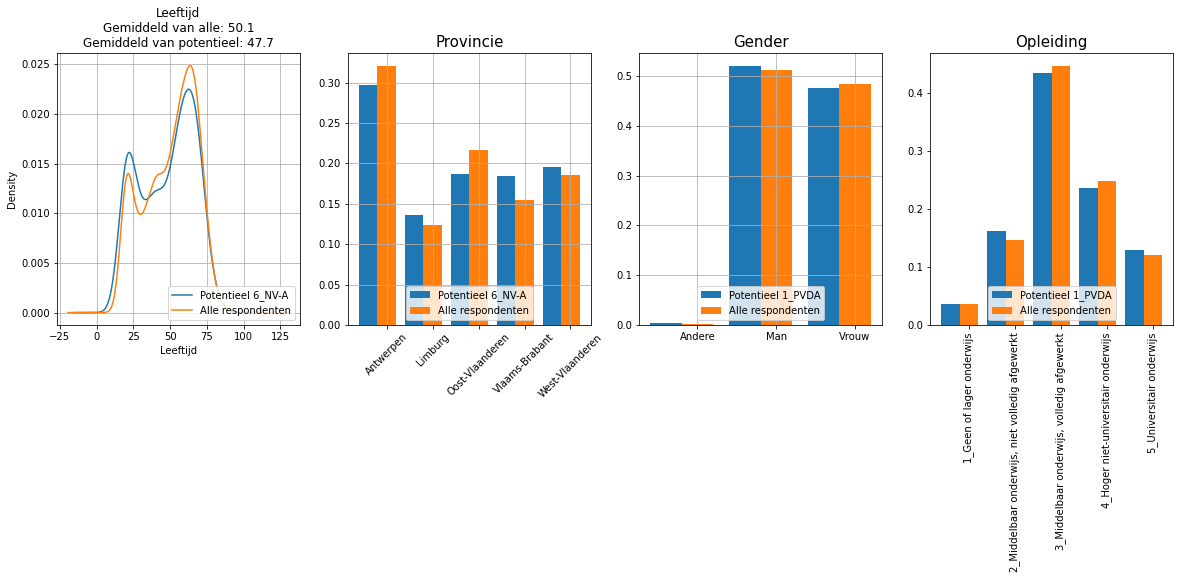

In [45]:
# Demographics
fig, axes = plt.subplots(1,4,figsize=(20,5))

# Age
potentieel['Age'].plot.kde(ax=axes[0], label='Potentieel {}'.format(geslecteerde_partij))
data_raw['Age'].plot.kde(ax=axes[0], label='Alle respondenten')
axes[0].set_title('''Leeftijd\nGemiddeld van alle: {:.1f}\nGemiddeld van potentieel: {:.1f}'''
                  .format(data_raw['Age'].mean(), potentieel['Age'].mean()), size=12)
axes[0].legend(loc='lower right')
axes[0].set_xlabel('Leeftijd')
axes[0].grid()

# Provincie
potentieel_provincie = potentieel['Provincie'].value_counts(normalize=True).sort_index()
axes[1].bar(x=np.arange(5)-0.2, height=potentieel_provincie, tick_label=potentieel_provincie.index, 
            width=0.4, label='Potentieel {}'.format(geslecteerde_partij))
axes[1].tick_params(axis='x', labelrotation=45 )
all_respondents_provincie = data_raw['Provincie'].value_counts(normalize=True).sort_index()
axes[1].bar(x=np.arange(5)+0.2, height=all_respondents_provincie, tick_label=all_respondents_provincie.index, 
            width=0.4, label='Alle respondenten')
axes[1].tick_params(axis='x', labelrotation=45 )
axes[1].set_title('Provincie', size=15)
axes[1].legend(loc='lower center')
axes[1].grid()

# Geslacht
potentieel_geslacht = potentieel['Gender'].value_counts(normalize=True).sort_index()
axes[2].bar(tick_label = potentieel_geslacht.index, x=np.arange(3)-0.2, height=potentieel_geslacht.values,
           width=0.4, label='Potentieel {}'.format(geselecteerde_partij))
all_respondents_geslacht = data_raw['Gender'].value_counts(normalize=True).sort_index()
axes[2].bar(tick_label = all_respondents_geslacht.index, x=np.arange(3)+0.2, height=all_respondents_geslacht.values,
           width=0.4, label='Alle respondenten')
axes[2].grid()
axes[2].set_title('Gender', size=15)
axes[2].legend(loc='lower center')

# Opleiding
potentieel_opleiding = potentieel['Education'].value_counts(normalize=True).sort_index()
axes[3].bar(x=np.arange(5)-0.2, tick_label=potentieel_opleiding.index, height=potentieel_opleiding,
            label='Potentieel {}'.format(geselecteerde_partij), width=0.4)
all_respondents_opleiding = data_raw['Education'].value_counts(normalize=True).sort_index()
axes[3].bar(x=np.arange(5)+0.2, tick_label=all_respondents_opleiding.index, height=all_respondents_opleiding, 
            label='Alle respondenten', width=0.4)
axes[3].tick_params(axis='x', labelrotation=90 )
axes[3].set_title('Opleiding', size=15)
axes[3].legend(loc='lower center')

Text(0, 0.5, 'Percent')

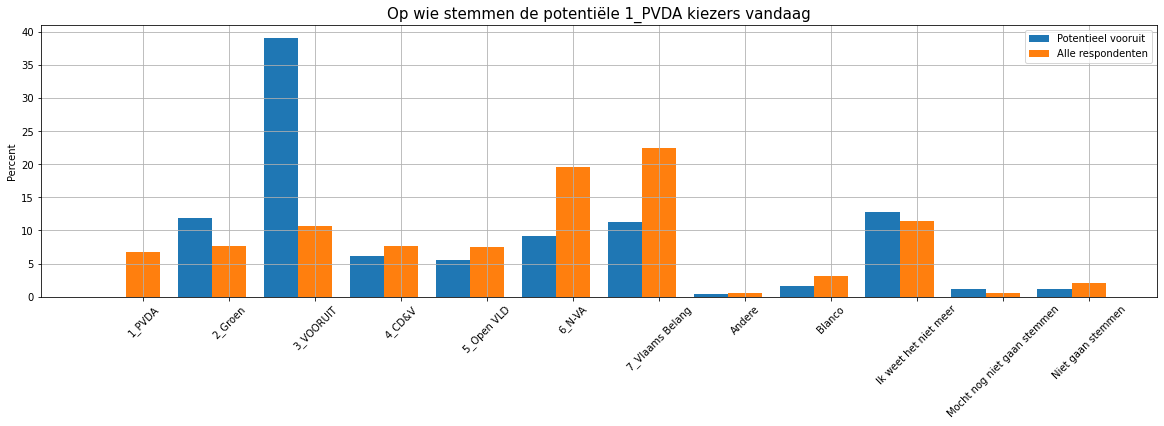

In [46]:
# Op wie stemt het potentieel van Vooruit vandaag
potenteel_stemvandaag = potentieel['VoteChoiceNow'].value_counts(normalize=True).sort_index()*100
potenteel_stemvandaag[geselecteerde_partij]=0
potenteel_stemvandaag = potenteel_stemvandaag.sort_index()

all_respondents_stemvandaag = data_raw['VoteChoiceNow'].value_counts(normalize=True).sort_index()*100

fig, ax = plt.subplots(1,1,figsize=(20,5))

ax.bar(tick_label=potenteel_stemvandaag.index, height=potenteel_stemvandaag, 
            x=np.arange(len(potenteel_stemvandaag))-0.2, width=0.4, label='Potentieel vooruit')
ax.bar(tick_label=all_respondents_stemvandaag.index, height=all_respondents_stemvandaag, 
            x=np.arange(len(all_respondents_stemvandaag))+0.2, width=0.4, label='Alle respondenten')

ax.tick_params(axis='x', labelrotation=45)
ax.grid()
ax.legend()
ax.set_title('Op wie stemmen de potentiële {} kiezers vandaag'.format(geselecteerde_partij), size=15)
ax.set_ylabel('Percent')

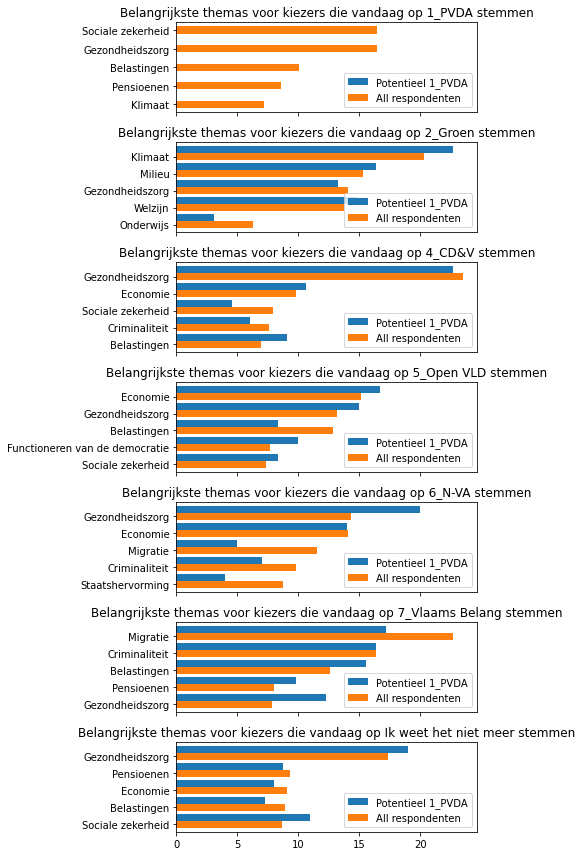

In [51]:
# Aanval: potentieel
fig, axes = plt.subplots(7,1,figsize=(8,12), sharex=True)

for i, partij in enumerate(['1_PVDA', '2_Groen', '4_CD&V', '5_Open VLD', '6_N-VA', '7_Vlaams Belang', 'Ik weet het niet meer']):

    row_mask = data_raw['VoteChoiceNow']==partij
    subset = data_raw.loc[row_mask,:]
    themas_all = (subset['MIP_Closed_1'].append(subset['MIP_Closed_2'])).value_counts(normalize=True).sort_values()*100
    
    row_mask = potentieel['VoteChoiceNow']==partij
    subset = potentieel.loc[row_mask,:]
    themas_vooruit = (subset['MIP_Closed_1'].append(subset['MIP_Closed_2'])).value_counts(normalize=True).sort_values()*100
    
    themas = pd.concat([themas_all, themas_vooruit], axis=1)
    themas.columns = ['all', 'potentieel']
    themas = themas.sort_values('all', ascending=False).head(5).sort_values(by='all')

    axes[i].barh(y = np.arange(len(themas))+0.2, width=themas['potentieel'], tick_label=themas.index, 
                 height=0.4, label='Potentieel {}'.format(geselecteerde_partij))
    axes[i].barh(y = np.arange(len(themas))-0.2, width=themas['all'], tick_label=themas.index, 
                 height=0.4, label='All respondenten')    
    
    axes[i].set_title('Belangrijkste themas voor kiezers die vandaag op {} stemmen'.format(partij))
    axes[i].legend()
    fig.tight_layout()

Text(0.5, 1.0, 'Hoeveel % zou ooit op 1_PVDA kunnen stemmen \n(Potentiëel score>0)')

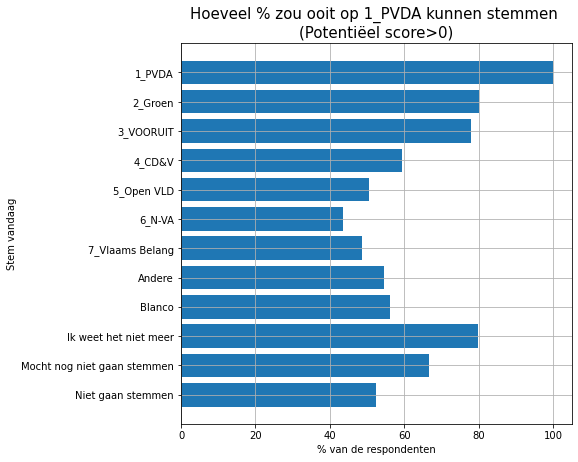

In [48]:
correct_column_name_dict = {
    '1_PVDA':'ElecUtil_PVDA',
    '2_Groen':'ElecUtil_GROEN',
    '3_Vooruit':'ElecUtil_VOORUIT',
    '4_CD&V':'ElecUtil_CDV',
    '5_Open VLD':'ElecUtil_OPENVLD',
    '6_NV-A':'ElecUtil_NVA',
    '7_Vlaams Belang':'ElecUtil_VB',
}
correct_column_name = correct_column_name_dict[geselecteerde_partij]

percent_not_zero_potential = data_raw.groupby('VoteChoiceNow')[correct_column_name].apply(lambda x: np.mean(x>0)*100)
percent_not_zero_potential = percent_not_zero_potential.sort_index(ascending=False)

fig, ax = plt.subplots(1,1,figsize=(7,7))

ax.barh(tick_label = percent_not_zero_potential.index, 
        width=percent_not_zero_potential.values, 
        y=np.arange(len(percent_not_zero_potential)))
ax.grid()
ax.set_ylabel('Stem vandaag')
ax.set_xlabel('% van de respondenten')
ax.set_title('Hoeveel % zou ooit op {} kunnen stemmen \n(Potentiëel score>0)'.format(geselecteerde_partij), size=15)

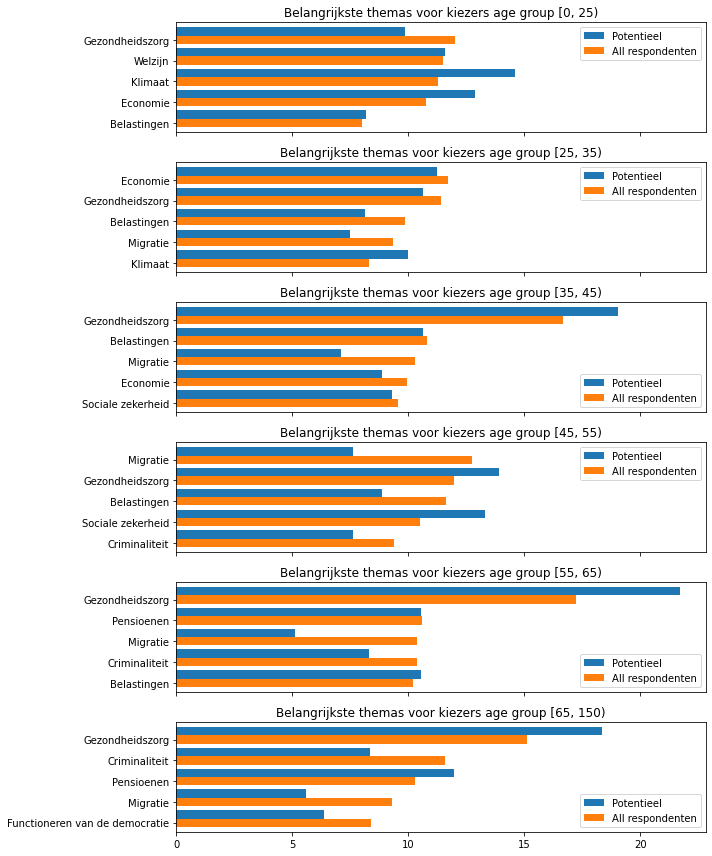

In [49]:
fig, axes = plt.subplots(6,1,figsize=(10,12), sharex=True)

for i, age_group in enumerate(np.unique(potentieel_vooruit['Age_group'])):
    
    row_mask = data_raw['Age_group']==age_group
    subset = data_raw.loc[row_mask,:]
    themas_all = (subset['MIP_Closed_1'].append(subset['MIP_Closed_2'])).value_counts(normalize=True).sort_values()*100
    
    row_mask = potentieel_vooruit['Age_group']==age_group
    subset = potentieel_vooruit.loc[row_mask,:]
    themas_vooruit = (subset['MIP_Closed_1'].append(subset['MIP_Closed_2'])).value_counts(normalize=True).sort_values()*100
    
    themas = pd.concat([themas_all, themas_vooruit], axis=1)
    themas.columns = ['all', 'potentieel']
    themas = themas.sort_values('all', ascending=False).head(5).sort_values(by='all')
    
    axes[i].barh(y = np.arange(len(themas))+0.2, width=themas['potentieel'], tick_label=themas.index, height=0.4, label='Potentieel')
    axes[i].barh(y = np.arange(len(themas))-0.2, width=themas['all'], tick_label=themas.index, height=0.4, label='All respondenten')    
    
    axes[i].set_title('Belangrijkste themas voor kiezers age group {}'.format(age_group))
    axes[i].legend()
    fig.tight_layout()    
    
fig.tight_layout()    

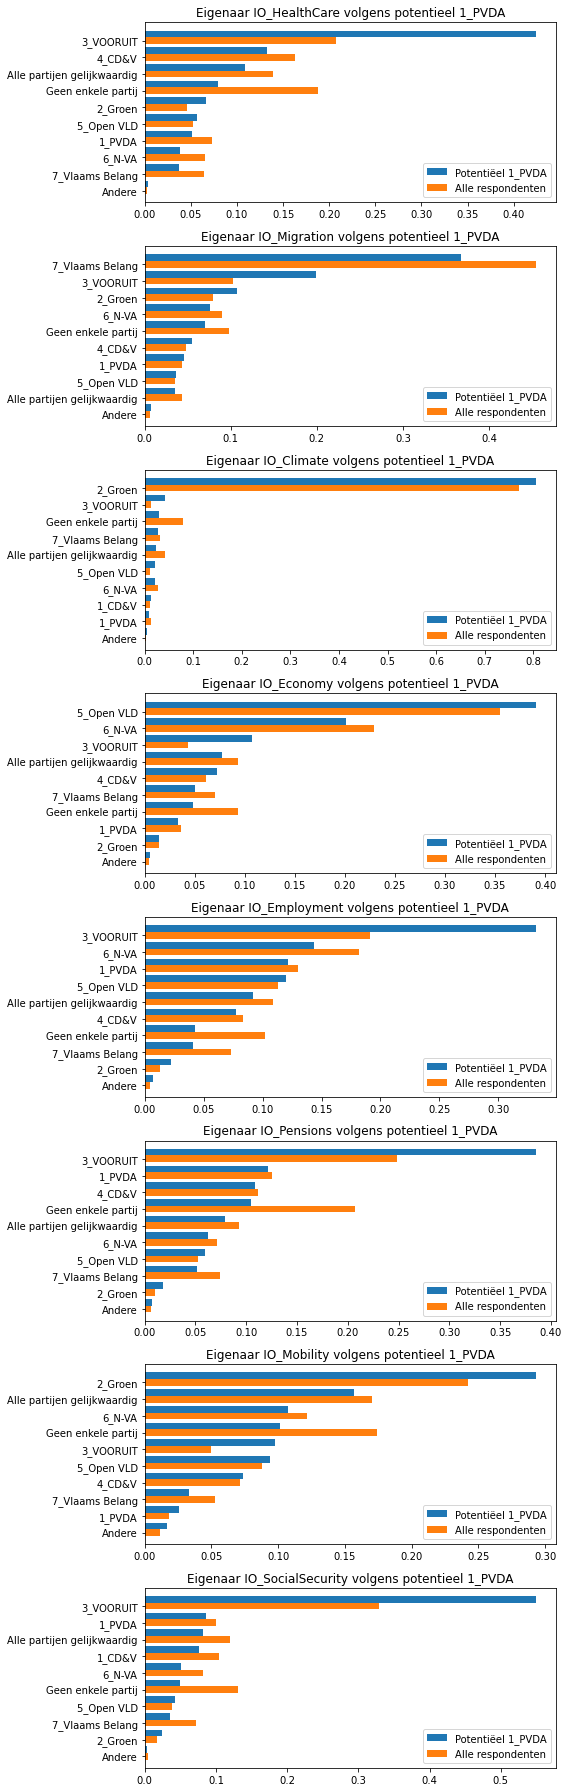

In [53]:
# eigenaar themas
themas = ['IO_HealthCare', 'IO_Migration', 'IO_Climate', 'IO_Economy', 'IO_Employment', 'IO_Pensions', 
          'IO_Mobility', 'IO_SocialSecurity']

fig, axes = plt.subplots(len(themas), 1, figsize=(8, 25))
    
for i, thema in enumerate(themas):
    
    potentieel_grouped_per_partij = potentieel[thema].value_counts(normalize=True)
    all_respondenten_grouped_per_partij = data_raw[thema].value_counts(normalize=True)
    grouped_per_partij = pd.concat([potentieel_grouped_per_partij, all_respondenten_grouped_per_partij], axis=1)
    grouped_per_partij.columns=['Potentieel', 'All']
    grouped_per_partij = grouped_per_partij.sort_values('Potentieel')

    axes[i].barh(y=np.arange(len(grouped_per_partij.index))+0.2, 
                 width=grouped_per_partij['Potentieel'].values, tick_label=grouped_per_partij.index, 
                 label='Potentiëel {}'.format(geselecteerde_partij), height=0.4)        
    
    axes[i].barh(y=np.arange(len(grouped_per_partij.index))-0.2, 
                 width=grouped_per_partij['All'], tick_label=grouped_per_partij.index,
                label='Alle respondenten', height=0.4)    
    
    axes[i].set_title('Eigenaar {} volgens potentieel {}'.format(thema, geselecteerde_partij))
    axes[i].legend()
    
fig.tight_layout()

## Potentieel verlies

In [55]:
# Verdediging. Vooruitstemmers vandaag, maar die potentieel op andere partijden zouden stemmen
row_mask = (data_raw['VoteChoiceNow']==geselecteerde_partij)
print('{:.1f}% van de respondenten stemt vandaag op {}'.format(np.mean(row_mask)*100, geselecteerde_partij))
potentieel_verlies = data_raw.loc[row_mask,:].copy()

6.7% van de respondenten stemt vandaag op 1_PVDA


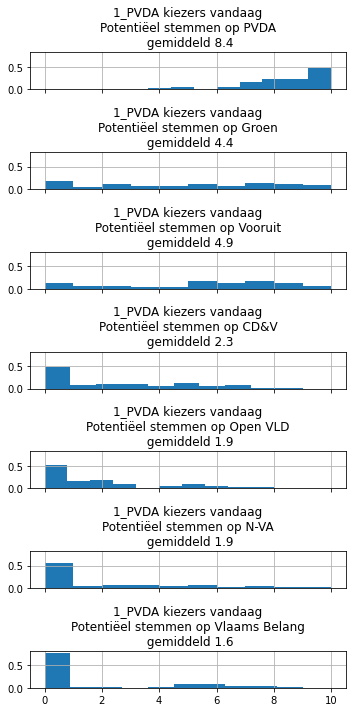

In [61]:
fig, axes = plt.subplots(7,1, sharex=True, sharey=True, figsize=(5,10))

potentieel_verlies['ElecUtil_PVDA'].hist(ax=axes[0], density=True)
axes[0].set_title('{} kiezers vandaag\nPotentiëel stemmen op PVDA\n gemiddeld {:.1f}'
                  .format(geselecteerde_partij, potentieel_verlies['ElecUtil_PVDA'].mean()))

potentieel_verlies['ElecUtil_GROEN'].hist(ax=axes[1], density=True)
axes[1].set_title('{} kiezers vandaag\nPotentiëel stemmen op Groen\n gemiddeld {:.1f}'
                  .format(geselecteerde_partij, potentieel_verlies['ElecUtil_GROEN'].mean()))

potentieel_verlies['ElecUtil_VOORUIT'].hist(ax=axes[2], density=True)
axes[2].set_title('{} kiezers vandaag\nPotentiëel stemmen op Vooruit\n gemiddeld {:.1f}'
                  .format(geselecteerde_partij, potentieel_verlies['ElecUtil_VOORUIT'].mean()))

potentieel_verlies['ElecUtil_CDV'].hist(ax=axes[3], density=True)
axes[3].set_title('{} kiezers vandaag\nPotentiëel stemmen op CD&V\n gemiddeld {:.1f}'
                  .format(geselecteerde_partij, potentieel_verlies['ElecUtil_CDV'].mean()))

potentieel_verlies['ElecUtil_OPENVLD'].hist(ax=axes[4], density=True)
axes[4].set_title('{} kiezers vandaag\nPotentiëel stemmen op Open VLD\n gemiddeld {:.1f}'
                  .format(geselecteerde_partij, potentieel_verlies['ElecUtil_OPENVLD'].mean()))

potentieel_verlies['ElecUtil_NVA'].hist(ax=axes[5], density=True)
axes[5].set_title('{} kiezers vandaag\nPotentiëel stemmen op N-VA\n gemiddeld {:.1f}'
                  .format(geselecteerde_partij, potentieel_verlies['ElecUtil_NVA'].mean()))

potentieel_verlies['ElecUtil_VB'].hist(ax=axes[6], density=True)
axes[6].set_title('{} kiezers vandaag\nPotentiëel stemmen op Vlaams Belang\n gemiddeld {:.1f}'
                  .format(geselecteerde_partij, potentieel_verlies['ElecUtil_VB'].mean()))

fig.tight_layout()

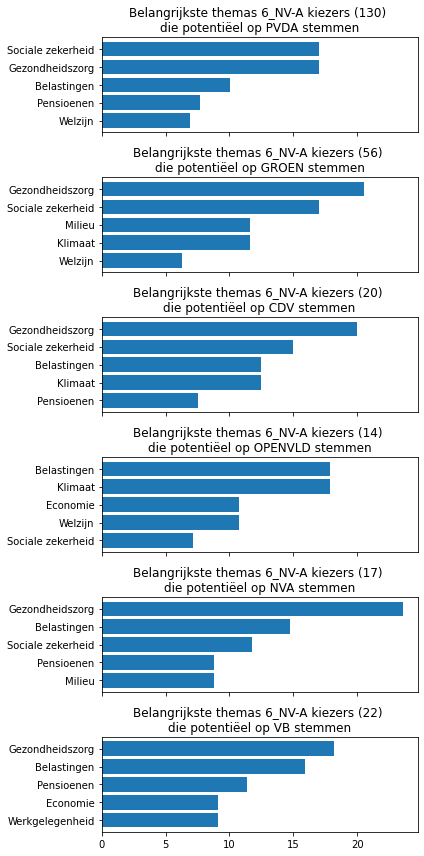

In [62]:
fig, axes = plt.subplots(6,1,figsize=(6,12), sharex=True)

for i, partij in enumerate(['PVDA', 'GROEN', 'CDV', 'OPENVLD', 'NVA', 'VB']):
    
    row_mask = potentieel_verlies['ElecUtil_{}'.format(partij)]>5
    subset = potentieel_verlies.loc[row_mask,:]
    
    themas = (subset['MIP_Closed_1'].append(subset['MIP_Closed_2'])).value_counts(normalize=True).sort_values().tail(5)*100
    
    axes[i].barh(y = np.arange(len(themas)), width=themas, tick_label=themas.index)
    axes[i].set_title('Belangrijkste themas {} kiezers ({}) \ndie potentiëel op {} stemmen'.format(
        geslecteerde_partij, len(subset),partij))
fig.tight_layout()

## Voorlopig einde van de notebook

Text(0, 0.5, 'Percent')

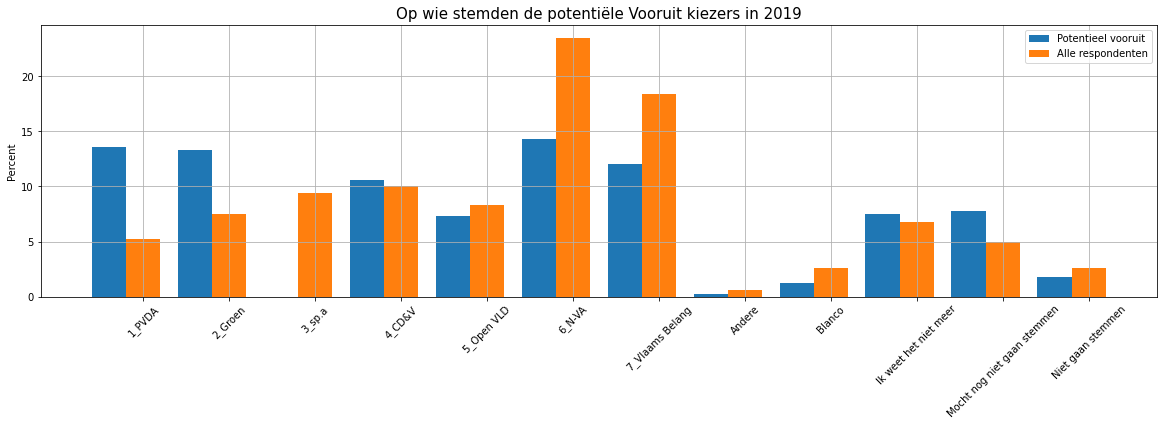

In [266]:
# Stem in 2019
potenteel_vote2019 = potentieel_vooruit['Vote2019_Fed'].value_counts(normalize=True).sort_index()*100
potenteel_vooruit_vote2019['3_sp.a']=0
potenteel_vooruit_vote2019 = potenteel_vooruit_vote2019.sort_index()

all_respondents_vote2019 = data_raw['Vote2019_Fed'].value_counts(normalize=True).sort_index()*100

fig, ax = plt.subplots(1,1,figsize=(20,5))

ax.bar(tick_label=potenteel_vooruit_vote2019.index, height=potenteel_vooruit_vote2019, 
            x=np.arange(len(potenteel_vooruit_vote2019))-0.2, width=0.4, label='Potentieel vooruit')
ax.bar(tick_label=all_respondents_vote2019.index, height=all_respondents_vote2019, 
            x=np.arange(len(all_respondents_vote2019))+0.2, width=0.4, label='Alle respondenten')

ax.tick_params(axis='x', labelrotation=45)
ax.grid()
ax.legend()
ax.set_title('Op wie stemden de potentiële Vooruit kiezers in 2019', size=15)
ax.set_ylabel('Percent')

In [222]:
# Switch motief

# Van PVDA naar Vooruit
print('Beweegreden van PVDA naar Vooruit')
print('---------------------------------')
row_mask = (data_raw['VoteChoiceNow'] == '3_VOORUIT') & (data_raw['Vote2019_Fed'] == '1_PVDA')
for motive in data_raw.loc[row_mask,'SwitchMotive'].dropna():
    print('+ '+motive)
    
# Van Groen naar Vooruit
print('\nBeweegreden van Groen naar Vooruit')
print('---------------------------------')
row_mask = (data_raw['VoteChoiceNow'] == '3_VOORUIT') & (data_raw['Vote2019_Fed'] == '2_Groen')
for motive in data_raw.loc[row_mask,'SwitchMotive'].dropna():
    print('+ '+motive)
    
# Van CD&V naar Vooruit
print('\nBeweegreden van CD&V naar Vooruit')
print('---------------------------------')
row_mask = (data_raw['VoteChoiceNow'] == '3_VOORUIT') & (data_raw['Vote2019_Fed'] == '4_CD&V')
for motive in data_raw.loc[row_mask,'SwitchMotive'].dropna():
    print('+ '+motive)
    
# Van OpenVLD naar Vooruit
print('\nBeweegreden van OpenVLD naar Vooruit')
print('---------------------------------')
row_mask = (data_raw['VoteChoiceNow'] == '3_VOORUIT') & (data_raw['Vote2019_Fed'] == '5_Open VLD')
for motive in data_raw.loc[row_mask,'SwitchMotive'].dropna():
    print('+ '+motive)
    
# Van N-VA naar Vooruit
print('\nBeweegreden van N-VA naar Vooruit')
print('---------------------------------')
row_mask = (data_raw['VoteChoiceNow'] == '3_VOORUIT') & (data_raw['Vote2019_Fed'] == '6_N-VA')
for motive in data_raw.loc[row_mask,'SwitchMotive'].dropna():
    print('+ '+motive)
    
# Van Vlaams Belang naar Vooruit
print('\nBeweegreden van Vlaams-Belang naar Vooruit')
print('---------------------------------')
row_mask = (data_raw['VoteChoiceNow'] == '3_VOORUIT') & (data_raw['Vote2019_Fed'] == '7_Vlaams Belang')
for motive in data_raw.loc[row_mask,'SwitchMotive'].dropna():
    print('+ '+motive)

Beweegreden van PVDA naar Vooruit
---------------------------------
+ PVDA is momenteel iets te links voor mij, voor zo ver ik tot nu toe op de hoogte ben doet VOORUIT het goed qua beleid in deze moeilijke tijden
+ Negatieve berichtgeving en het boek van Chris Destoop heeft mijn sympathie voor deze partij sterk bekoeld.
+ ik heb nu meer vertrouwen in het bewind van vooruit en hun nieuwe voorzitter.
+ prive
+ Hernieuwing kans geven

Beweegreden van Groen naar Vooruit
---------------------------------
+ behandeling covid
+ Omdat de moderne  spa (vooruit) me wel ligt
+ Ze brengen echt positief nieuws en willen het land vooruit hebben. Ook willen ze het pensioen verhogen en dit is voor mij binnenkort heel belangrijk. Ze hebben veel accenten waarmee ik me kan vereenzelven.
+ beiden liggen me wacht nog af
+ Groen heeft teleurgesteld in de hele saga met Calvo
+ partijvoorzitter
+ Heb meer vertrouwen gekregen in de partij VOORUIT, terwijl de groene voorzitster van de partij , haar medewerkers 

In [161]:
# Van PVDA naar Vooruit
print('Beweegreden van Vooruit naar PVDA')
print('---------------------------------')
row_mask = (data_raw['VoteChoiceNow'] == '1_PVDA') & (data_raw['Vote2019_Fed'] == '3_sp.a')
for motive in data_raw.loc[row_mask,'SwitchMotive'].dropna():
    print('+ '+motive)
    
# Van Groen naar Vooruit
print('\nBeweegreden van Vooruit naar Groen')
print('---------------------------------')
row_mask = (data_raw['VoteChoiceNow'] == '2_Groen') & (data_raw['Vote2019_Fed'] == '3_sp.a')
for motive in data_raw.loc[row_mask,'SwitchMotive'].dropna():
    print('+ '+motive)
    
# Van CD&V naar Vooruit
print('\nBeweegreden van Vooruit naar CD&V')
print('---------------------------------')
row_mask = (data_raw['VoteChoiceNow'] == '4_CD&V') & (data_raw['Vote2019_Fed'] == '3_sp.a')
for motive in data_raw.loc[row_mask,'SwitchMotive'].dropna():
    print('+ '+motive)
    
# Van OpenVLD naar Vooruit
print('\nBeweegreden van Vooruit naar Open-VLD')
print('---------------------------------')
row_mask = (data_raw['VoteChoiceNow'] == '5_Open VLD') & (data_raw['Vote2019_Fed'] == '3_sp.a')
for motive in data_raw.loc[row_mask,'SwitchMotive'].dropna():
    print('+ '+motive)
    
# Van N-VA naar Vooruit
print('\nBeweegreden van Vooruit naar N-VA')
print('---------------------------------')
row_mask = (data_raw['VoteChoiceNow'] == '6_N-VA') & (data_raw['Vote2019_Fed'] == '3_sp.a')
for motive in data_raw.loc[row_mask,'SwitchMotive'].dropna():
    print('+ '+motive)
    
# Van Vlaams Belang naar Vooruit
print('\nBeweegreden van Vooruit naar Vlaams Belang')
print('---------------------------------')
row_mask = (data_raw['VoteChoiceNow'] == '7_Vlaams Belang') & (data_raw['Vote2019_Fed'] == '3_sp.a')
for motive in data_raw.loc[row_mask,'SwitchMotive'].dropna():
    print('+ '+motive)

Beweegreden van Vooruit naar PVDA
---------------------------------
+ linkser
+ Heb er meer vertrouwen 8n
+ Huidig beleid van SPA baart mij enigszins zorgen , heb niet meer dat heel sterk vertrouwen alhoewel ik al jaren SPA stemmer ben
+ doen meer voor de werkende mensen
+ Er zijn geen sossen meer Conner is een watje
+ socialisme  is ontstaan als een arbeiders partij , wat men nog moeilijk kan geloven bij deze' vooruit ' die nog slecht een flauw aftreksel is van de waarden en normen die in het oorspronkelijk manifest werd voorop gesteld
hierdoor is de pvda een goed alternatief

+ Vooruit is een beetje vis nog vlees, pvda is extremer maar uit ervaring weet ik dat de scherpe kantjes er uiteindelijk toch wel afgaan.
+ kweeni
+ Voorzitter van Vooruit draagt niet lijn voorkeur weg. Hij heeft niet het linkse profiel.
+ Ze proberen de hypocrisie te ontmaskeren, dat op zich al is genoeg. Daarnaast is het een partij die actief verandering teweeg WIL brengen, en niet enkel loze beloftes maakt
+ 

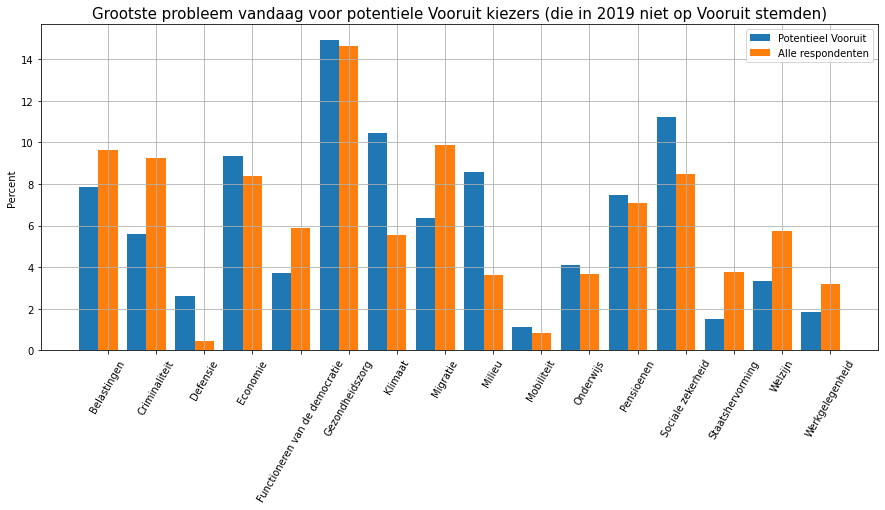

In [248]:
row_mask = (data_raw['ElecUtil_VOORUIT']>7) & (data_raw['Vote2019_Fed']!='3_sp.a')
potentieel_vooruit_grootste_probleem = (data_raw.loc[row_mask, 'MIP_Closed_1'].append(
                                        data_raw.loc[row_mask,'MIP_Closed_2'])).value_counts(normalize=True).sort_index()*100
all_grootste_probleem = (data_raw['MIP_Closed_1'].append(data_raw['MIP_Closed_2'])).value_counts(normalize=True).sort_index()*100

fig, ax = plt.subplots(1,1,figsize=(15,6))

ax.bar(x=np.arange(len(potentieel_vooruit_grootste_probleem))-0.2, height=potentieel_vooruit_grootste_probleem, 
              tick_label=potentieel_vooruit_grootste_probleem.index, width=0.4, label='Potentieel Vooruit')
ax.bar(x=np.arange(len(all_grootste_probleem))+0.2, height=all_grootste_probleem, 
              tick_label=all_grootste_probleem.index, width=0.4, label='Alle respondenten')


ax.tick_params(axis='x', labelrotation=60)
ax.grid()
ax.set_ylabel('Percent')
ax.set_title('Grootste probleem vandaag voor potentiele Vooruit kiezers (die in 2019 niet op Vooruit stemden)', size=15)
ax.legend()

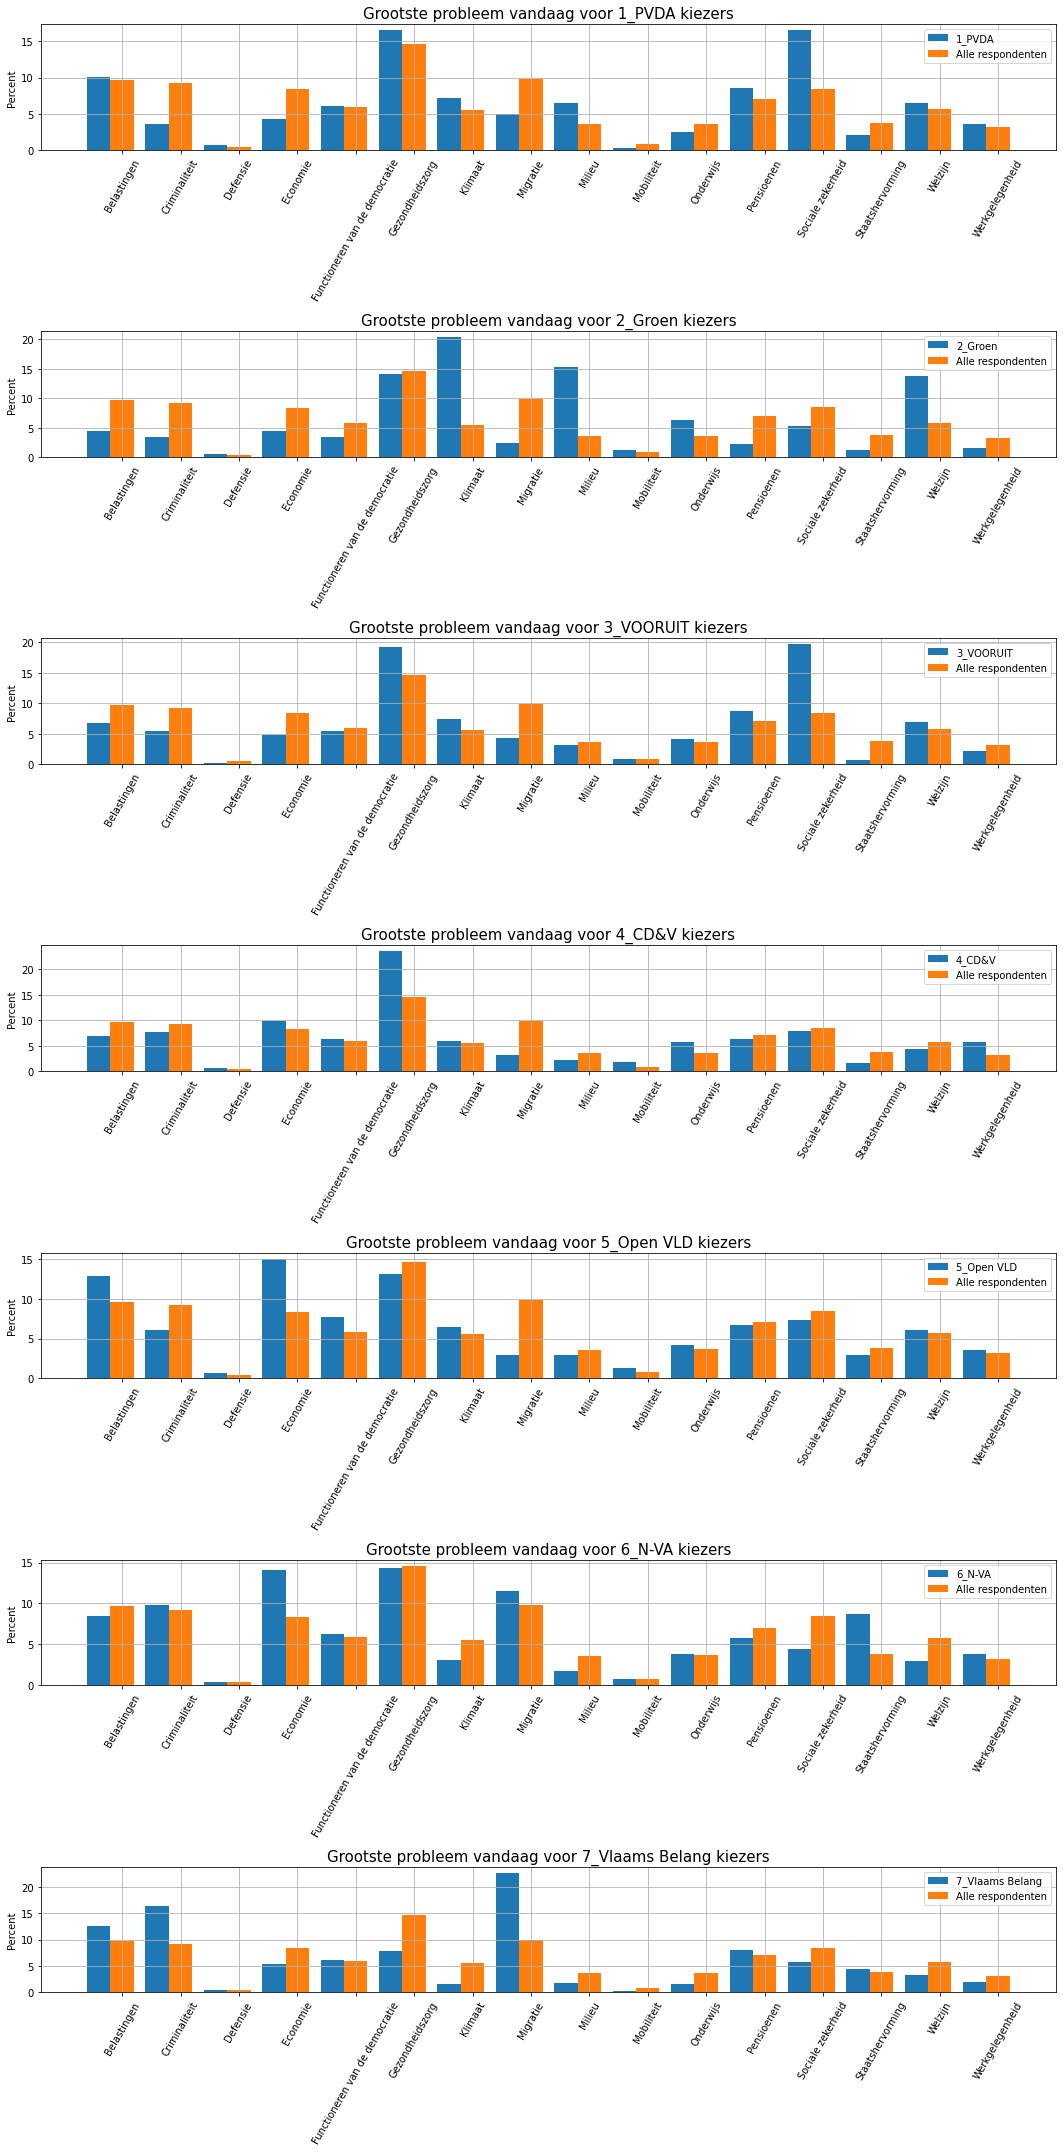

In [206]:
all_grootste_probleem = (data_raw['MIP_Closed_1'].append(data_raw['MIP_Closed_2'])).value_counts(normalize=True).sort_index()*100


fig, axes = plt.subplots(7,1,figsize=(15,30))

for i in [1,2,3,4,5,6,7]:

    row_mask = (data_raw['VoteChoiceNow'].str[0]==str(i))
    if(sum(row_mask)==0):continue
    
    temp_partij = data_raw.loc[row_mask,'VoteChoiceNow'].iloc[0]
    grootste_probleem = (data_raw.loc[row_mask, 'MIP_Closed_1'].append(data_raw.loc[row_mask, 'MIP_Closed_2'])).value_counts(normalize=True).sort_index()*100


    axes[i-1].bar(x=np.arange(len(grootste_probleem))-0.2, height=grootste_probleem, tick_label=grootste_probleem.index,
      label=temp_partij, width=0.4)
    axes[i-1].bar(x=np.arange(len(all_grootste_probleem))+0.2, height=all_grootste_probleem, tick_label=all_grootste_probleem.index, 
      label='Alle respondenten', width=0.4)

    axes[i-1].tick_params(axis='x', labelrotation=60)
    axes[i-1].grid()
    axes[i-1].set_ylabel('Percent')
    axes[i-1].set_title('Grootste probleem vandaag voor {} kiezers'.format(temp_partij), size=15)
    axes[i-1].legend(loc='upper right')

fig.tight_layout()

Text(0.5, 0, 'Links - Rechts')

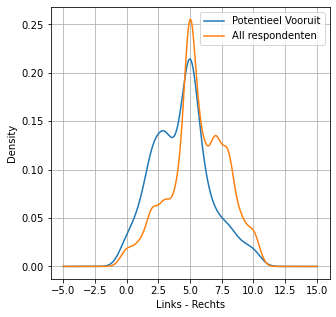

In [112]:
# Links-Rechts
fig, ax = plt.subplots(1,1,figsize=(5,5))
potentieel_vooruit['LeftRight'].plot.kde(ax=ax, label='Potentieel Vooruit')
data_raw['LeftRight'].plot.kde(ax=ax, label='All respondenten')
ax.grid()
ax.legend()
ax.set_xlabel('Links - Rechts')